
   # **Proyecto** Final - Melbourne Housing Prices

- ***Integrantes :***

* Martín Franck
* Florencia Radrizzani

***Comisión 29730: Coderhouse Data Science.***


*   `Profesor:`  Damián Dapueto
*   `Tutores:`   Fernando Trujillo - María Soledad Gutiérrez

##**- Tema de Investigación**

Estos datos fueron extraídos de los resultados disponibles publicados cada semana desde Domain.com.au y que son de dominio público.
El conjunto de datos incluye dirección, tipo de bienes raíces, suburbio, método de venta, habitaciones, precio, agente de bienes raíces, fecha de venta y distancia desde C.B.D. ( Distrito Central de Negocios).
También incluyen el tamaño de la propiedad, el tamaño de la tierra y el área del consejo.

Fuente: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market


##- Reseña de los datos.

Es una ciudad australiana, capital y mayor ciudad del estado de Victoria. Fue la capital de Australia entre 1901 y 1927, cuando se trasladó a la ciudad planificada de Canberra. ​
Escogida desde 2011 como la mejor ciudad del mundo para vivir, por sus altos niveles de calidad de vida y bajos niveles de pobreza
Melbourne es conocida en Australia como la ciudad jardín, y el estado de Victoria una vez fue conocido como el estado jardín. Hay una gran cantidad de parques y jardines en Melbourne, muchos cerca del CBD. También hay muchos parques en los alrededores de Melbourne, como en los municipios de Stonnington, Boroondara y de Port Phillip, al sureste del CBD.
La amplia superficie cubierta por zonas urbanas de Melbourne están formalmente divididas en cientos de suburbios (por asuntos relacionados con las direcciones y los códigos postales), y administrados como áreas de gobierno local. En Fitzroy, Brunswick Street tiene un ambiente artístico, mientras que Johnston Street es un centro de cultura hispana.


##*Descripción de las variables.*


*  `Suburb` - Barrio donde se ubica la propiedad.
*  `Address` - Dirección completa de la propiedad.
*  `Rooms` - Número de ambientes.
*  `Type` - Tipo de propiedad: u - unidad, h - casa, t- casa de pueblo.
*  `Price` - Precio de la propiedad (variable objetivo)
*  `Method` - Método de venta: S - propiedad vendida;
            S - propiedad vendida;
            SP - propiedad vendida anticipada;
            PI - propiedad que no alcanzó el precio mínimo en la subasta;
            PN - venta anticipada no revelada;
            SN - venta precio no revelado;
            VB - oferta del vendedor;
            W - retirada antes de la subasta;
            SA - propiedad subastada;
            SS - propiedad subastada precio no revelado;
*  `SellerG` - Nombre del vendedor.
*  `Date` - Necha de la venta.
*  `Distance` - Distancia de la propiedad al distrito central C.B.D.
*  `Postcode` - Código postal de la propiedad.
*  `Bedroom2` - Número de habitaciones.
*  `Bathroom` - Número de baños.
*  `Car` - Número de cocheras.
*  `Landsize` - Metros cuadrados del terreno.
*  `BuildingArea` - Metros cubiertos construidos.
*  `YearBuilt` - Año de construcción.
*  `CouncilArea` - Condado al que pertenece la propiedad.
*  `Lattitude` - Latitud.
*  `Longtitude` - Longitud.
*  `Regionname` - Región
*  `Propertycount` - Número de propiedades que existen en el barrio.


###Importamos las librerías que vamos a usar

In [ ]:
# Librerías para data wrangling y gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Algoritmos de regresión
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb

# Pipelines, Spliteo y Scalers
from sklearn.pipeline import Pipeline # generador de pipeline de trabajao
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer # fill a value
from sklearn.preprocessing import RobustScaler , OneHotEncoder, MinMaxScaler, StandardScaler #encoder para trasnformar columnas
from sklearn.model_selection import train_test_split # split de train y test
from sklearn.compose import ColumnTransformer #code to use feature cat and numeric together
from sklearn.compose import make_column_selector #selector in pipeline by dtypes

# Métricas
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import time

# Cross Validation e hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Mapeo de datos
import folium
from folium.features import DivIcon
from folium.plugins import HeatMap

###**Lectura de la base de datos.** Y damos formato de fecha al campo "Date"

In [ ]:
d_full = pd.read_csv('https://raw.githubusercontent.com/ameer-fice/ai-vodafone/main/datasets/Melbourne_housing_FULL.csv', parse_dates = ['Date'], sep = ',')

d_full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


###Nombre y tipo de cada variable del dataset, y su cantidad de valores no nulos. Hay 7610 nulos en el target (Price). Redimensionamos el dataset y trabajamos con los no nulos.

In [ ]:
d_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [ ]:
d_full =d_full[pd.notnull(d_full['Price'])]

**Hacemos un describe traspuesto para registrar las características de cada variable. Vemos tanto las categóricas como las numéricas.**

In [ ]:
d_full.describe(include= 'all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Suburb,27247,345,Reservoir,727,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,27247,26751,5 Charles St,4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,27247.0,NaN,NaN,NaN,NaT,NaT,2.992293,0.954795,1.0,2.0,3.0,4.0,16.0
Type,27247,3,h,18472,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247.0,NaN,NaN,NaN,NaT,NaT,1050173.344955,641467.130105,85000.0,635000.0,870000.0,1295000.0,11200000.0
Method,27247,5,S,17515,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,27247,349,Nelson,2735,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,27247,78,2017-10-28 00:00:00,879,2016-01-28,2018-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,27246.0,NaN,NaN,NaN,NaT,NaT,11.280276,6.787469,0.0,6.4,10.5,14.0,48.1
Postcode,27246.0,NaN,NaN,NaN,NaT,NaT,3113.79608,111.139676,3000.0,3046.0,3088.0,3153.0,3978.0


**Observaciones:**


1.   Existen variables con datos nulos
2.   Reservoir es moda en suburbios, Southern Metropolitan en Región.
3.   La casa típica con 75% tiene : 4 habitaciones, 2 baños, con un precio de $1.295.000, Cochera para 2 automóviles, del año 2.000.



# Tratamiento de valores nulos.

Vemos que cantidad de datos nulos y su proporción hay en cada variable.

In [ ]:
pd.concat([d_full.isnull().sum().to_frame('# nans'),
(100*d_full.isnull().sum()/len(d_full)).to_frame('% nans')], axis=1).sort_values('% nans',ascending=False)

,# nans,% nans
BuildingArea,16591,60.891107
YearBuilt,15163,55.650163
Landsize,9265,34.003744
Car,6824,25.044959
Bathroom,6447,23.661321
Bedroom2,6441,23.639300
Longtitude,6254,22.952986
Lattitude,6254,22.952986
Regionname,3,0.011010
CouncilArea,3,0.011010


La variable con más nulos es BuildingArea, aprox un 61% de sus datos son nulos, lo que hace desaconsejable imputarlos. Algo similar ocurre con YearBuilt con 55% de datos faltantes.

Chequeamos el caso que queda con nulo en distancia y código postal y lo corregimos.

In [ ]:
distance_null = d_full[d_full.Distance.isnull()]
distance_null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Corregimos el nombre de un Suburbio con un solo caso y su nombre es prácticamente el mismo que otro con muchas viviendas.

In [ ]:
d_full.loc[d_full.Suburb == "Fawkner Lot", 'Suburb']="Fawkner"

Observamos que quedan pocos nulos en 5 variables. Si bien no se debe completar nulos en las variables antes de separar en base de entrenamiento y testeo. En este caso se puede hacer dado que estos datos faltantes tienen una relación directa con otras variables. Suburb con CouncilArea, Regionname y Propertycount.

In [ ]:
d_full['Regionname'] = d_full.groupby('Suburb', sort=False)['Regionname'].fillna(method='ffill', axis=0)
d_full['CouncilArea'] = d_full.groupby('Suburb', sort=False)['CouncilArea'].fillna(method='ffill', axis=0)
d_full['Propertycount'] = d_full.groupby('Suburb', sort=False)['Propertycount'].fillna(method='ffill', axis=0)

In [ ]:
d_full.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          0
Lattitude         6254
Longtitude        6254
Regionname           0
Propertycount        0
dtype: int64

In [ ]:
d_full['Distance'] = d_full.groupby('Suburb', sort=False)['Distance'].fillna(method='ffill', axis=0)
d_full['Postcode'] = d_full.groupby('Suburb', sort=False)['Postcode'].fillna(method='ffill', axis=0)

In [ ]:
d_full.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          0
Lattitude         6254
Longtitude        6254
Regionname           0
Propertycount        0
dtype: int64

Creamnos una nueva variable a partir de "Date".


In [ ]:
d_full['Anio_Mes'] = d_full['Date'].dt.strftime('%Y%m')

In [ ]:
d_full["Anio_Mes"] = d_full["Anio_Mes"].astype(str).astype(int)

### Gráfico de precio promedio y cantidad de unidades vendidas por mes

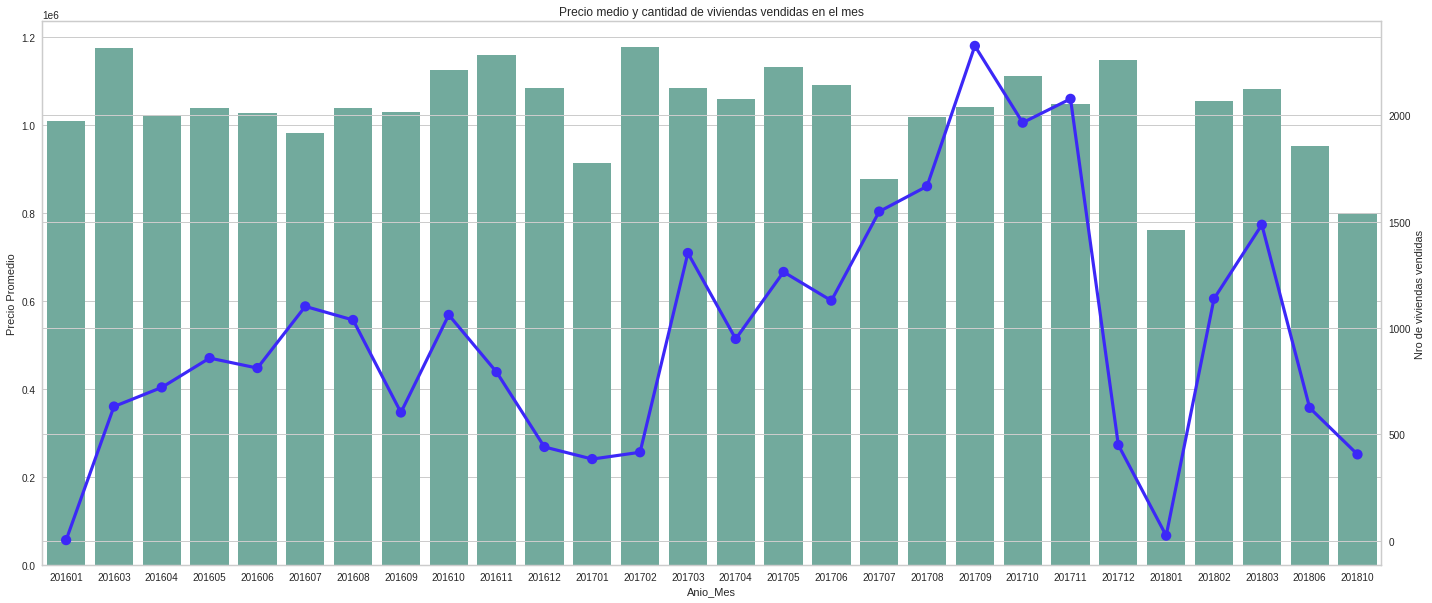

In [ ]:
# hacemos un group del precio medio por mes
mean_p = d_full.groupby('Anio_Mes')['Price'].describe()[['count', 'mean']].reset_index()
# Seteamos el tamaño de la figura.
sns.set_style(style=None, rc=None)
#plt.figure(figsize=(24, 10))
fig, axes = plt.subplots(figsize=(24,10))

# Barplot por mes del precio
axes=sns.barplot(
    y="mean",
    x="Anio_Mes",
    data=mean_p,
    ci=None,
    label="Price",
    color='#69b3a2')
axes.set_ylabel('Precio Promedio')
axes2 = axes.twinx()
# Pointplot por mes de las viviendas vendidas
axes=sns.pointplot(
    y="count",
    x="Anio_Mes",
    data=mean_p,
    ci=None,
    label="Count",
    color='#3c28f7',ax=axes2).set(title='Precio medio y cantidad de viviendas vendidas en el mes')
axes2.set_ylabel('Nro de viviendas vendidas');


En el gráfico anterior se observa una disminución de los precios promedios de las viviendas vendidas hacia el año 2018. Se observa que hay meses faltantes en la serie, sobre todo en 2018. Y tanto Enero 2016 como Enero 2018 tienen muy pocas propiedades vendidas. En el resto de los meses hay más de 400 viviendas vendidas.

### Gráfico de dispersión de las variables más importantes diferenciando por tipo de vivienda.

<Figure size 1152x720 with 0 Axes>

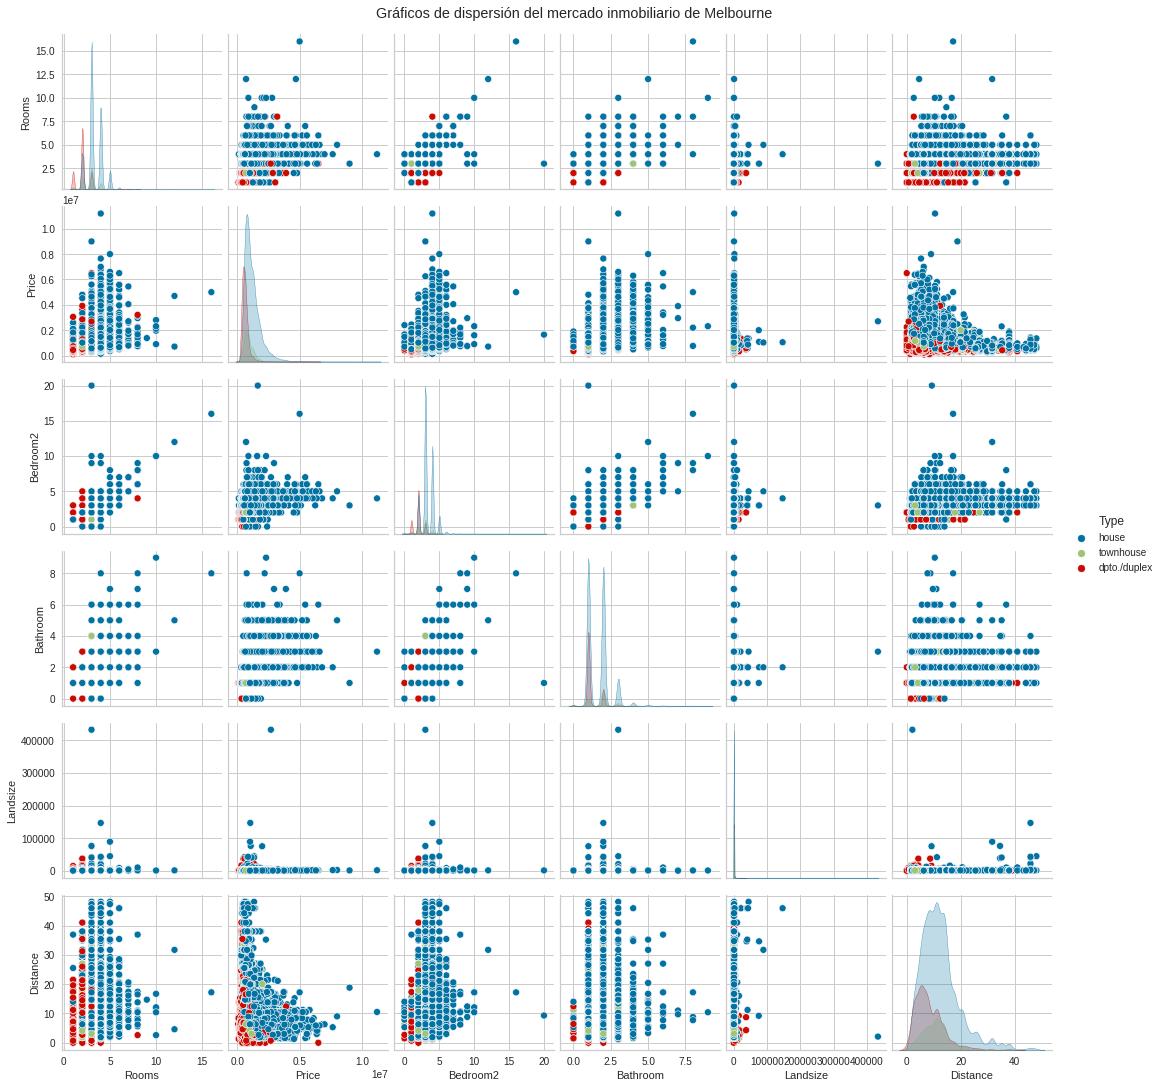

In [ ]:
d_full['Type'] = d_full['Type'].map({'t':'townhouse',
                                            'u':'dpto./duplex',
                                            'h':'house'
                                            })
dfull_m = d_full.loc[:,['Rooms','Price','Bedroom2','Bathroom','Landsize','Distance','Type']]
#config generica
plt.figure(figsize=(16, 10))
g = sns.pairplot(dfull_m, hue='Type')
g.fig.suptitle("Gráficos de dispersión del mercado inmobiliario de Melbourne", y=1.01);

Del análisis del anterior Pairplot, llaman la atención dos valores atípicos. Uno en landsize de mas de 400mil metros cuadrados. Y otro en Bedroom2 igual a 20, que seguramente sea un error ya que Rooms es igual a 2. Eliminamos ambos casos.

In [ ]:
d_full.drop(d_full[d_full.Landsize >400000].index, inplace=True)
d_full.drop(d_full[d_full.Bedroom2 == 20].index, inplace=True)
d_full['Bedroom2']=d_full['Bedroom2'].replace(0, np.nan)
d_full['Landsize']=d_full['Landsize'].replace(0, np.nan)
d_full['Bathroom']=d_full['Bathroom'].replace(0, np.nan)

Acompañamos el análisis con gráficos de Boxplot.

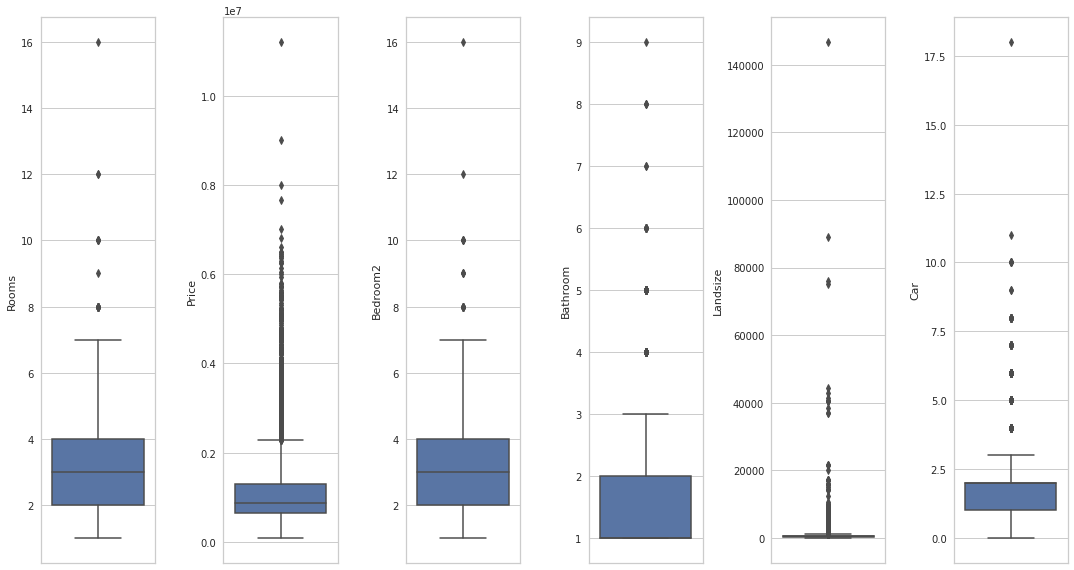

In [ ]:
variables = ['Rooms','Price','Bedroom2','Bathroom','Landsize','Car']

fig, axes = plt.subplots(1, len(variables), figsize=(15,8))
sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":15})
for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=d_full, ax=ax)
plt.tight_layout()

Se observa una gran cantidad de outliers en nuestra variable objetivo.

###Analizamos las variables discretas con histogramas.

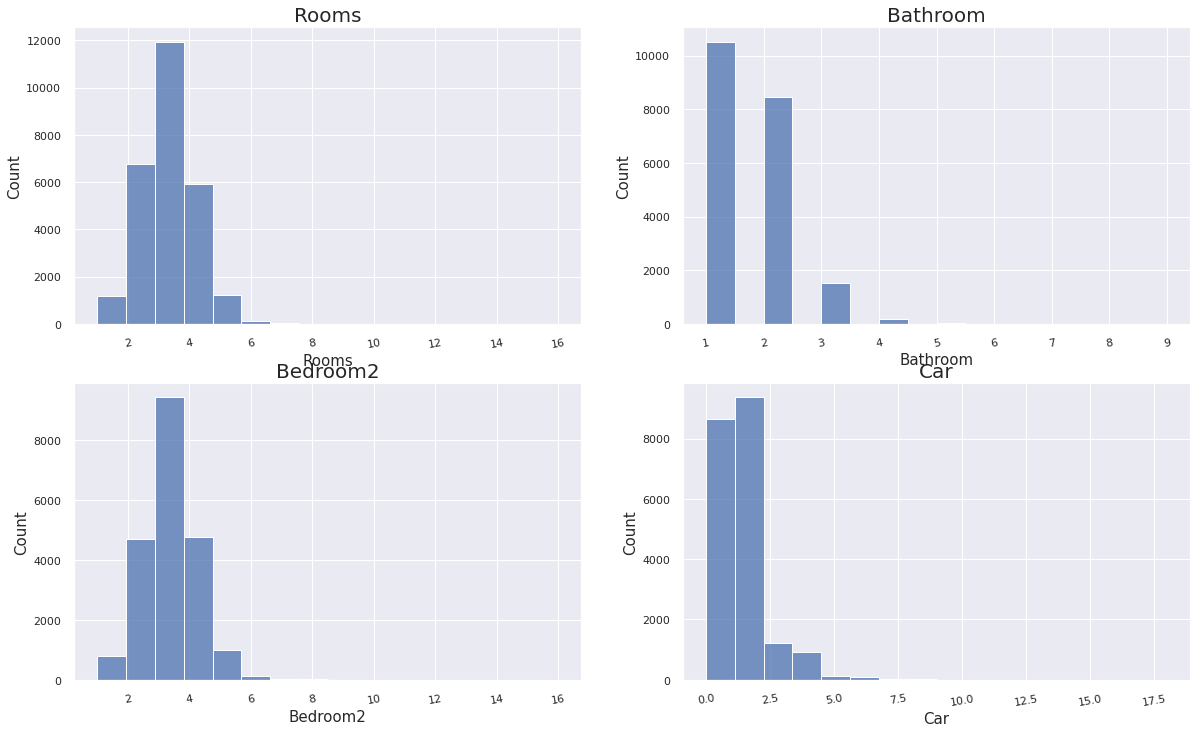

In [ ]:
fig , axes = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20,12))


sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":0})
sns.histplot(data=d_full, x='Rooms', ax=axes[0][0], bins='sturges').set(title='Rooms', );
axes[0][0].tick_params(axis='x', rotation=10)

sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":0})
sns.histplot(data=d_full, x='Bedroom2', ax=axes[1][0], bins='sturges').set(title='Bedroom2', );
axes[0][1].tick_params(axis='x', rotation=10)

sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":0})
sns.histplot(data=d_full, x='Bathroom', ax=axes[0][1], bins='sturges').set(title='Bathroom', );
axes[1][0].tick_params(axis='x', rotation=10)

sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":0})
sns.histplot(data=d_full, x='Car', ax=axes[1][1], bins='sturges').set(title='Car', );
axes[1][1].tick_params(axis='x', rotation=10)

Utilizando el gráfico de Hisograma, podríamos decir que para cada una de las variables casi la totalidad de los casos se ubica por debajo de 7 unidades. Rooms y Bedroom2 tienen su moda en 3 unidades. Bathroom en 1 y Car(cocheras) en 2.

###Graficamos las correlaciones de las variables por el método Spearman, resaltando correlaciones mayores a 0,5.

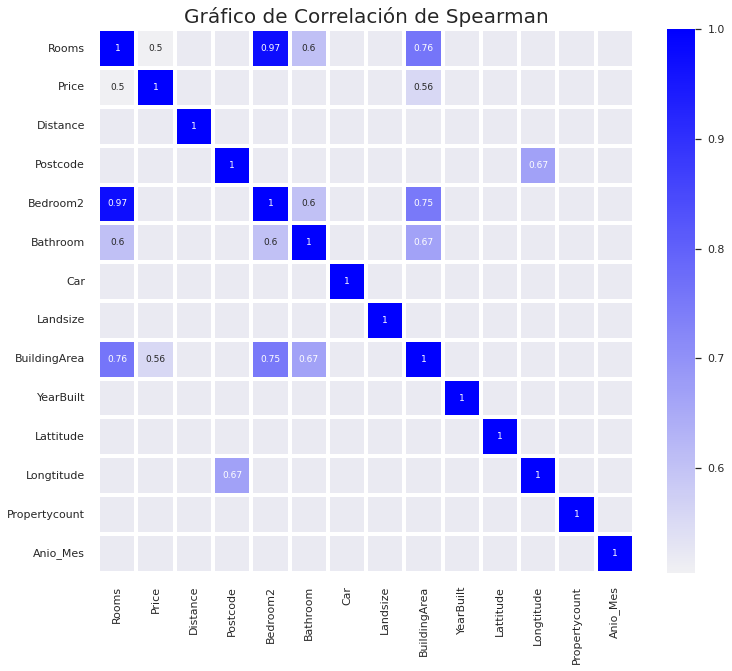

In [ ]:
#generacion de correlacion
mat_corr_sp = d_full.corr('spearman')
high_corr = mat_corr_sp[mat_corr_sp>=.5]

plt.rcParams['figure.figsize'] = 12, 10
#seleccion de colores
cmap = sns.light_palette('blue', as_cmap = True)
#mapa de calor sobre valores de heatmap
sns.heatmap(high_corr,  cmap = cmap, annot = True, linewidth = 3);#mask = mask,
plt.title('Gráfico de Correlación de Spearman');

###Precios de las viviendas vendidas por Región

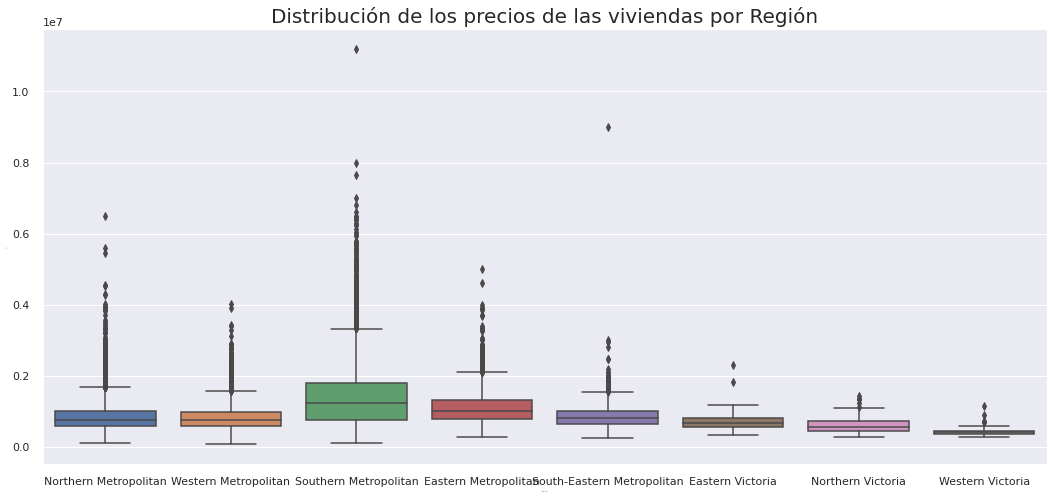

In [ ]:
plt.subplots(figsize=(18, 8))
sns.boxplot(x=d_full['Regionname'], y=d_full['Price'])
plt.title('Distribución de los precios de las viviendas por Región')
plt.show()

En este gráfico se puede observar claramente que la región "Sur Metropolitana" es la que cuenta con los precios medios más elevados, con un precio promedio de 1.4 millones de dólares australianos(DA) aproximadamente.
Seguida por la región Este Metropolitana, con un precio medio de 1.1 millones (DA).

##Mapa de la ciudad de Melbourne con la ubicación de las propiedades vendidas.

In [ ]:
folium_map = folium.Map(prefer_canvas=True)
#Creamos un dataset temporal con los registros que tienen valores en Latitud y Longitud
temp = d_full[d_full['Lattitude'].notnull() & d_full['Longtitude'].notnull()]

temp['colores'] = temp['Regionname'].map({'Northern Metropolitan':'red',
                                            'Western Metropolitan':'blue',
                                            'Southern Metropolitan':'gray',
                                            'Eastern Metropolitan':'orange',
                                            'South-Eastern Metropolitan':'green',
                                            'Northern Victoria':'black',
                                            'Eastern Victoria':'purple',
                                            'Western Victoria':'pink'})

temp = temp.loc[:,['Lattitude','Longtitude','Regionname','colores']]

def plotDot(point):
    folium.CircleMarker(
        location=[point.Lattitude, point.Longtitude],
        radius=0.7,
        color=point.colores,
        weight=3,
        fill_opacity=0.7
        ).add_to(folium_map)

temp.apply(plotDot, axis=1)
#Seteo del zoom al máximo posible
folium_map.fit_bounds(folium_map.get_bounds())
folium_map

Output hidden; open in https://colab.research.google.com to view.

Eliminamos variables que no tienen utilidad en el análisis.

In [ ]:
d_full.drop(['Suburb','Date','Address','SellerG','Postcode','YearBuilt','Lattitude','Longtitude','BuildingArea','CouncilArea'], axis=1, inplace=True)

Hacemos una transformación logarítmica en base 10, porque performa mejor que el logarítmo natural, a las variables Precio y Landsize.

In [ ]:
d_full['Price'] = np.log10(d_full['Price'])
d_full['Landsize'] = np.log10(d_full['Landsize'])
bckup = d_full.copy()

Spliteo del dataset en train y test.

In [ ]:
#split in target
X = d_full.drop('Price', axis=1)
y = d_full['Price']

#spliteo de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_copy = X_train.copy()
X_train.head()

,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,Regionname,Propertycount,Anio_Mes
21166,3,house,S,7.5,3.0,1.0,2.0,2.818226,Western Metropolitan,9264.0,201709
13424,3,townhouse,PI,9.9,NaN,NaN,NaN,NaN,Northern Metropolitan,7485.0,201704
8726,3,townhouse,SP,2.6,NaN,NaN,NaN,NaN,Northern Metropolitan,14949.0,201603
2349,2,townhouse,VB,5.9,2.0,1.0,1.0,NaN,Northern Metropolitan,7082.0,201607
25277,2,dpto./duplex,S,8.5,NaN,NaN,NaN,NaN,Northern Metropolitan,7485.0,201710


Vamos a rellenar algunas variables numéricas discretas con la mediana de cada una de ellas en viviendas de un mismo nro. de habitaciones.
Y luego las convertimos en variables enteras.

In [ ]:
valores1 = X_train.groupby('Rooms').Bedroom2.median().round()
X_train.loc[X_train['Bedroom2'].isna(), 'Bedroom2'] = X_train.loc[X_train['Bedroom2'].isna(), 'Rooms'].apply(lambda x: valores1[x])
X_test.loc[X_test['Bedroom2'].isna(), 'Bedroom2'] = X_test.loc[X_test['Bedroom2'].isna(), 'Rooms'].apply(lambda x: valores1[x])

valores2 = X_train.groupby('Rooms').Bathroom.median().round()
X_train.loc[X_train['Bathroom'].isna(), 'Bathroom'] = X_train.loc[X_train['Bathroom'].isna(), 'Rooms'].apply(lambda x: valores2[x])
X_test.loc[X_test['Bathroom'].isna(), 'Bathroom'] = X_test.loc[X_test['Bathroom'].isna(), 'Rooms'].apply(lambda x: valores2[x])

valores3 = X_train.groupby('Rooms').Bedroom2.median().round()
X_train.loc[X_train['Car'].isna(), 'Car'] = X_train.loc[X_train['Car'].isna(), 'Rooms'].apply(lambda x: valores3[x])
X_test.loc[X_test['Car'].isna(), 'Car'] = X_test.loc[X_test['Car'].isna(), 'Rooms'].apply(lambda x: valores3[x])

valores4 = X_train.groupby('Rooms').Landsize.mean().round()
X_train.loc[X_train['Landsize'].isna(), 'Landsize'] = X_train.loc[X_train['Landsize'].isna(), 'Rooms'].apply(lambda x: valores4[x])
X_test.loc[X_test['Landsize'].isna(), 'Landsize'] = X_test.loc[X_test['Landsize'].isna(), 'Rooms'].apply(lambda x: valores4[x])
X_train.isnull().sum()

Rooms            0
Type             0
Method           0
Distance         0
Bedroom2         1
Bathroom         1
Car              1
Landsize         2
Regionname       0
Propertycount    0
Anio_Mes         0
dtype: int64

Observamos los últimos nulos que quedan, y los llenamos con el promedio por Suburbio de cada una de ellas.

In [ ]:
last_nulls = X_train[X_train.Landsize.isnull()]
last_nulls

,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,Regionname,Propertycount,Anio_Mes
26210,16,house,S,17.2,16.0,8.0,8.0,NaN,Eastern Metropolitan,6871.0,201710
7535,9,house,S,14.7,NaN,NaN,NaN,NaN,South-Eastern Metropolitan,3692.0,201610


Imputamos estos últimos casos y chequeamos que no queden datos sin imputar.

In [ ]:
valores5 = X_train.groupby('Regionname').Bedroom2.median().round()
X_train.loc[X_train['Bedroom2'].isna(), 'Bedroom2'] = X_train.loc[X_train['Bedroom2'].isna(), 'Regionname'].apply(lambda x: valores5[x])
X_test.loc[X_test['Bedroom2'].isna(), 'Bedroom2'] = X_test.loc[X_test['Bedroom2'].isna(), 'Regionname'].apply(lambda x: valores5[x])

valores6 = X_train.groupby('Regionname').Bathroom.median().round()
X_train.loc[X_train['Bathroom'].isna(), 'Bathroom'] = X_train.loc[X_train['Bathroom'].isna(), 'Regionname'].apply(lambda x: valores6[x])
X_test.loc[X_test['Bathroom'].isna(), 'Bathroom'] = X_test.loc[X_test['Bathroom'].isna(), 'Regionname'].apply(lambda x: valores6[x])

valores7 = X_train.groupby('Regionname').Bedroom2.median().round()
X_train.loc[X_train['Car'].isna(), 'Car'] = X_train.loc[X_train['Car'].isna(), 'Regionname'].apply(lambda x: valores7[x])
X_test.loc[X_test['Car'].isna(), 'Car'] = X_test.loc[X_test['Car'].isna(), 'Regionname'].apply(lambda x: valores7[x])

valores8 = X_train.groupby('Regionname').Landsize.mean().round()
X_train.loc[X_train['Landsize'].isna(), 'Landsize'] = X_train.loc[X_train['Landsize'].isna(), 'Regionname'].apply(lambda x: valores8[x])
X_test.loc[X_test['Landsize'].isna(), 'Landsize'] = X_test.loc[X_test['Landsize'].isna(), 'Regionname'].apply(lambda x: valores8[x])

X_train.isnull().sum()

Rooms            0
Type             0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Regionname       0
Propertycount    0
Anio_Mes         0
dtype: int64

Convertimos a número entero algunas variables discretas.

In [ ]:
X_train['Bedroom2'] = X_train['Bedroom2'].astype('int')
X_train['Bathroom'] = X_train['Bathroom'].astype('int')
X_train['Car'] = X_train['Car'].astype('int')

Y luego hacemos un boxplot después de aplicar el Robust Scaler para los Outliers

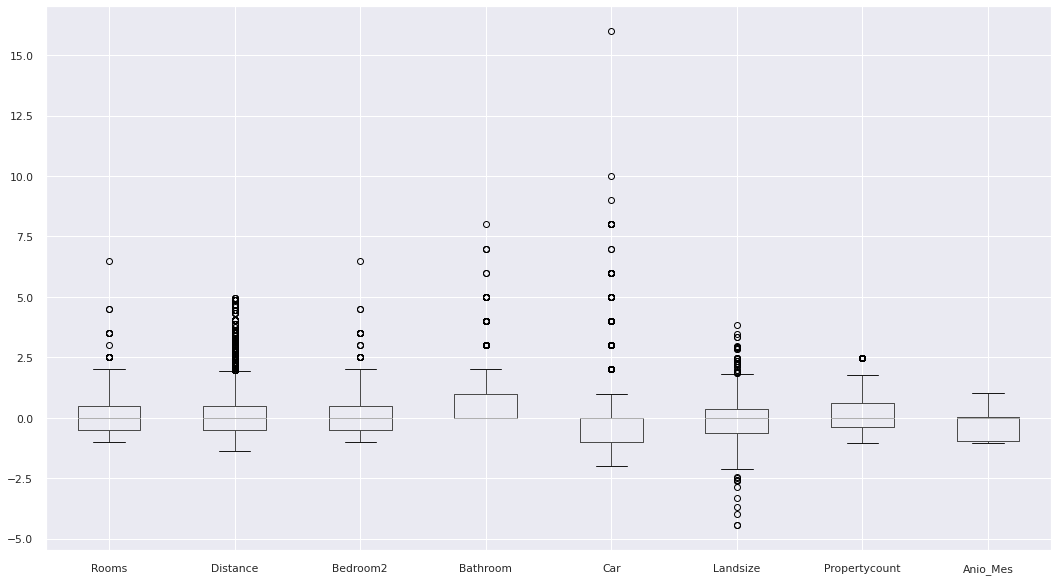

In [ ]:
#copio df
df_copy = X_train.copy()

df_copy.drop(['Type','Regionname','Method'], axis=1, inplace=True)

scale = RobustScaler()
sData = pd.DataFrame(scale.fit_transform(df_copy), columns = df_copy.columns)
#para observar los outliers
sData.boxplot(fontsize = 'large', figsize = (18, 10))

Definimos las transformaciones numéricas (RobusScaler) y categóricas (OneHotlEncoder).


In [ ]:
#generar a pipeline para numericas
numeric_transformer = Pipeline(
    steps=[
        ("scaler", RobustScaler())
        ]
        )

#generar un pipeline para categoricas
categorical_transformer = OneHotEncoder( handle_unknown="ignore")

#funcion que realiza el trabajo para cada pipeline y luego unirlo
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ]
)

#entrenamiento del pipeline
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b733a9fd0>),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b733a9c90>)])

Ejecutamos las transformaciones numéricas (RobusScaler) y categóricas (One Hot Encoder)

In [ ]:
preprocessor.named_transformers_['cat'].get_feature_names_out()

array(['Type_dpto./duplex', 'Type_house', 'Type_townhouse', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Western Victoria'],
      dtype=object)

In [ ]:
X_array_enc = preprocessor.transform(X_train)
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat'].get_feature_names_out())
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index=X_train.index)
X_train_enc.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,21796.0,-0.002569,0.480897,-1.000000,-0.500000,0.0,0.500000,6.500000
Distance,21796.0,0.111147,0.884141,-1.368421,-0.526316,0.0,0.473684,4.960526
Bedroom2,21796.0,-0.007501,0.480070,-1.000000,-0.500000,0.0,0.500000,6.500000
Bathroom,21796.0,0.509405,0.679158,0.000000,0.000000,0.0,1.000000,8.000000
Car,21796.0,-0.017159,1.093676,-2.000000,-1.000000,0.0,0.000000,16.000000
Landsize,21796.0,-0.200117,0.619185,-4.447868,-0.649800,0.0,0.350200,3.815088
Propertycount,21796.0,0.164201,0.735354,-1.059823,-0.371527,0.0,0.628473,2.465348
Anio_Mes,21796.0,-0.163731,0.628995,-1.060000,-0.970000,0.0,0.030000,1.030000
Type_dpto./duplex,21796.0,0.216324,0.411747,0.000000,0.000000,0.0,0.000000,1.000000
Type_house,21796.0,0.678244,0.467161,0.000000,0.000000,1.0,1.000000,1.000000


###Hacemos un primer análisis estimando una Regresión Lineal por el método de mínimos cuadrados

In [ ]:
model = LinearRegression()
model.fit(X_train_enc, y_train)

LinearRegression()

In [ ]:
X_test1 = preprocessor.transform(X_test)
pred = model.predict(X_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Vemos las métricas que arroja: Error absoluto medio (MAE) - Error cuadrático medio (MSE) - Precisión (R2) - Error absoluto porcentual (MAPE) y Raíz2 de Error cuadrático medio (RMSE)

In [ ]:
metrics_dict = {'MAE': [mean_absolute_error(y_test, pred)], 'MSE': [mean_squared_error(y_test, pred)],
              'R2': [r2_score(y_test, pred)], 'MAPE': [mean_absolute_percentage_error(y_test, pred)],
              'RMSE': [np.sqrt(mean_squared_error(y_test, pred))]}
pd.DataFrame.from_dict(metrics_dict, orient='index')

,0
MAE,0.099913
MSE,0.016779
R2,0.671296
MAPE,0.016748
RMSE,0.129533


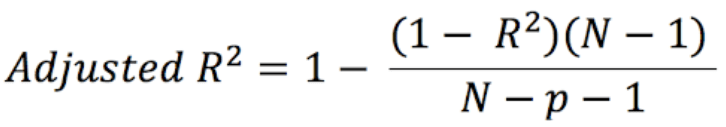

Estimamos el R2 ajustado, que es una mejor métrica que el R2 ya que no se ve afectada por la cantidad de variables. Siendo N el total de registros en el dataset y p la cantidad de variables independientes.

In [ ]:
n= len(X_train_enc)
p = len(X_train_enc.columns)
adj_R2 = 1- ((1-r2_score(y_test, pred)) * (n-1)/(n-p-1))
print("R2 ajustado : ", adj_R2)

R2 ajustado :  0.6709338660428495


Si analizamos los coeficientes del modelo de regresión lineal, vemos que todas las variables dummy tienen coeficiente 0. Esto en principio estaría indicando que estas variables no son importantes para explicar el precio de las viviendas vendidas en el mercado analizado.

In [ ]:
cdf = pd.DataFrame(data = model.coef_, index = X_train_enc.columns, columns = ['Coefficients'])
10**(cdf)

,Coefficients
Rooms,1.350677
Distance,0.741360
Bedroom2,1.047800
Bathroom,1.085952
Car,1.025982
Landsize,1.004394
Propertycount,0.995490
Anio_Mes,1.038609
Type_dpto./duplex,0.000000
Type_house,0.000000


Los residuos de la Regresión Log-Lineal tienen una distribución bastante normal.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


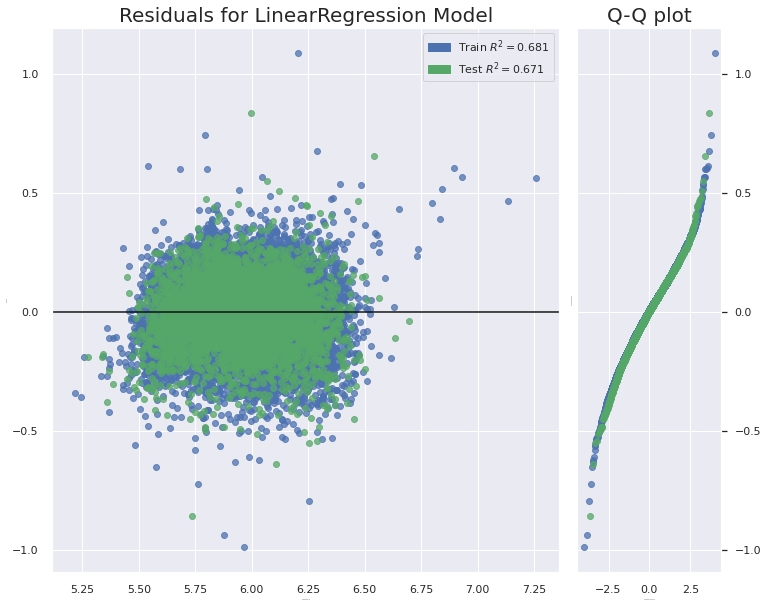

In [ ]:
visualizer = ResidualsPlot(model,hist=False, qqplot=True)

visualizer.fit(X_train_enc, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test)  # Evaluate the model on the test data
visualizer.show();

Ahora estimamos un Random Forest Regressor

In [ ]:
# Creamos el clasificador
classifier = RandomForestRegressor(n_estimators=500, random_state=42)
start_time = time.time()
# Entrenamos el modelo usando el conjunto de entranamiento
classifier.fit(X_train_enc, y_train)
end_time = time.time()
print("time:", round(end_time-start_time, 5))

time: 47.44093


In [ ]:
y_pred2 = classifier.predict(X_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Métricas Random Forest simple

In [ ]:
pred2 = classifier.predict(X_test1)
metrics_dict_rf1 = {'MAE': [mean_absolute_error(y_test, pred2)], 'MSE': [mean_squared_error(y_test, pred2)],
              'R2': [r2_score(y_test, pred2)], 'MAPE': [mean_absolute_percentage_error(y_test, pred2)],
              'RMSE': [np.sqrt(mean_squared_error(y_test, pred2))]}
pd.DataFrame.from_dict(metrics_dict_rf1, orient='index')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


,0
MAE,0.069050
MSE,0.009011
R2,0.823477
MAPE,0.011550
RMSE,0.094924


Cálculo de R2 ajustado

In [ ]:
n= len(X_train_enc)
p = len(X_train_enc.columns)
adj_R2_rf = 1- ((1-r2_score(y_test, pred2)) * (n-1)/(n-p-1))
print("R2 ajustado : ", adj_R2_rf)

R2 ajustado :  0.8232822757927272


El Random Forest Regressor da un R2 ajustado alto y errores relativamente bajos. Por otra parte, vemos que tanto el R2 como el R2 ajustado presentan valores muy similares, y por lo tanto no es significativo el impacto que tiene el número de variables explicativas en la precisión del ajuste del modelo.

Verificamos las la importancia de las variables.

In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train_enc.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
8,Type_dpto./duplex,0.216472
21,Regionname_Southern Metropolitan,0.209167
1,Distance,0.158640
0,Rooms,0.093279
5,Landsize,0.064409
16,Regionname_Eastern Metropolitan,0.053871
6,Propertycount,0.046799
7,Anio_Mes,0.042960
2,Bedroom2,0.028543
3,Bathroom,0.017553


Vemos lo anterior en un gráfico de barras ordenado siendo la variable que más explica el precio de las viviendas el tipo de hogar "unidad-dúplex (departamentos)"

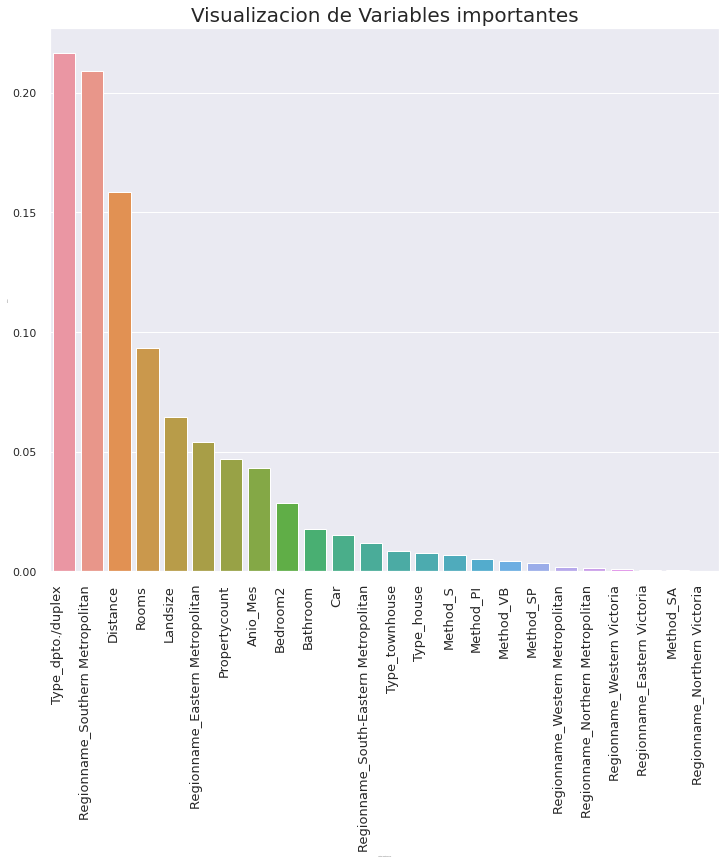

In [ ]:
# Visualización de las Variables importantes en un gráfico de barras

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Etiquetas
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizacion de Variables importantes")
plt.xticks(
    rotation=90, horizontalalignment="right", fontweight="light", fontsize="x-large"
);

En el análisis anterior se puede observar la importancia de las variables en el modelo de predicción. La región de Victoria reviste poca importancia básicamente porque son muy pocos casos de propiedades vendidas en dicha región. Es interesante observar que la variable Method, que indica cómo fue vendida la propiedad,  prácticamente no incide en el precio, con lo cual puede ser interesante sacarla del modelo y ver si performa mejor. Por otro lado la variable que más incide en el precio es el tipo de vivienda (dpto./duplex). Luego siguen en importancia las viviendas ubicadas en la región metropolitana sur, la distancia de las mismas al centro de la ciudad, el tamaño del terreno y la cantidad de ambientes.

Analizamos como están distribuidas las variables creadas por el One Hot Encoding

In [ ]:
pd.concat([X_train_enc.loc[:,['Type_house','Type_townhouse','Type_dpto./duplex','Method_S','Method_SA','Method_SP','Method_VB','Method_PI','Regionname_Eastern Victoria',
                   'Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
                   'Regionname_Western Metropolitan','Regionname_Western Victoria','Regionname_Eastern Metropolitan']].sum().to_frame('cnt'),
(100*X_train_enc.loc[:,['Type_house','Type_townhouse','Type_dpto./duplex','Method_S','Method_SA','Method_SP','Method_VB','Method_PI','Regionname_Eastern Victoria',
    'Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
    'Regionname_Western Metropolitan','Regionname_Western Victoria','Regionname_Eastern Metropolitan']].sum()/len(X_train_enc)).to_frame('% cnt')], axis=1)

,cnt,% cnt
Type_house,14783.0,67.824371
Type_townhouse,2298.0,10.543219
Type_dpto./duplex,4715.0,21.632410
Method_S,13945.0,63.979629
Method_SA,148.0,0.679024
Method_SP,2910.0,13.351074
Method_VB,2181.0,10.006423
Method_PI,2612.0,11.983850
Regionname_Eastern Victoria,126.0,0.578088
Regionname_Northern Metropolitan,6317.0,28.982382


Se observa que en la región de Victoria apenas 325 viviendas vendidas en un  dataset de más de 20mil. El tipo de propiedad más costosa son las unidades/duplex y son un poco menos de 5mil casos. Lo siguiente para mejorar el modelo sería englobar las regiones menos importantes en una sola región y remover del modelo la variable Method ya que se observa que no aporta demasiado.

Vamos a dejar afuera del modelo las Variables que surgen de Method, ya que vemos que el método de venta no es importante en nuestro análisis.

In [ ]:
X_train_new = X_train_enc.loc[:,['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Anio_Mes','Type_house','Type_townhouse','Type_dpto./duplex','Regionname_Eastern Victoria',
                   'Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
                   'Regionname_Western Metropolitan','Regionname_Western Victoria','Regionname_Eastern Metropolitan']]


In [ ]:
X_test1 = pd.DataFrame(X_test1, columns = columns_enc, index=X_test.index)
X_test_new = X_test1.loc[:,['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Anio_Mes','Type_house','Type_townhouse','Type_dpto./duplex','Regionname_Eastern Victoria',
                   'Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
                   'Regionname_Western Metropolitan','Regionname_Western Victoria','Regionname_Eastern Metropolitan']]

###Analizamos el modelo "Decision Tree Regressor" con "KFOLD cross validation" e hiperparámetros.

In [ ]:
t = DecisionTreeRegressor(max_depth=15)
par = list(np.arange(0.0, 1., step=0.05,))
cv = KFold(n_splits=4, random_state=42, shuffle=True)
tunner = GridSearchCV(estimator=t, param_grid={'ccp_alpha':par}, cv=cv)
start_time = time.time()
_=tunner.fit(X_train_new, y_train)
end_time = time.time()
print("time:", round(end_time-start_time, 5))

time: 22.67435


In [ ]:
print('Train score KFold Tree: ' + str(tunner.score(X_train_new, y_train)))
print('Test score KFold Tree: ' + str(tunner.score(X_test_new, y_test)))

Train score KFold Tree: 0.9234815927548125
Test score KFold Tree: 0.7399127845018321


Métricas Decision Tree para el Train

In [ ]:
Dtree0 = tunner.predict(X_train_new)
metrics_dict_Dtree0 = {'MAE': [mean_absolute_error(y_train, Dtree0)], 'MSE': [mean_squared_error(y_train, Dtree0)],
              'R2': [r2_score(y_train, Dtree0)], 'MAPE': [mean_absolute_percentage_error(y_train, Dtree0)],
              'RMSE': [np.sqrt(mean_squared_error(y_train, Dtree0))]}
pd.DataFrame.from_dict(metrics_dict_Dtree0, orient='index')

,0
MAE,0.040994
MSE,0.003844
R2,0.923482
MAPE,0.006870
RMSE,0.062001


Métricas Decision Tree para el Test

In [ ]:
Dtree = tunner.predict(X_test_new)
metrics_dict_Dtree = {'MAE': [mean_absolute_error(y_test, Dtree)], 'MSE': [mean_squared_error(y_test, Dtree)],
              'R2': [r2_score(y_test, Dtree)], 'MAPE': [mean_absolute_percentage_error(y_test, Dtree)],
              'RMSE': [np.sqrt(mean_squared_error(y_test, Dtree))]}
pd.DataFrame.from_dict(metrics_dict_Dtree, orient='index')

,0
MAE,0.082919
MSE,0.013276
R2,0.739913
MAPE,0.013873
RMSE,0.115222


Hay una amplia diferencia entre el train y el test, esto supone una alta variabilidad.

###Estimamos un Random Forest Regressor con Hiperparámetros.

In [ ]:
#Hypertuning utilizando grid search
random_forest = RandomForestRegressor(random_state=42) #Instanciamos el modelo
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [100,200],
    'max_features': [6,10,12],
    "max_depth": [ 4,10,20] ,
    "min_samples_split": [2,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
start_time = time.time()
#Entrenamos el modelo
grid_random_forest.fit(X_train_new, y_train)
end_time = time.time()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(max_depth=20, max_features=10, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
#Predicción de casos nuevos
grid_random_forest.predict(X_train_new)
grid_random_forest.predict(X_test_new)

array([5.84397275, 5.59474579, 5.90414711, ..., 5.80893733, 5.97968698,
       5.69341499])

In [ ]:
#todos los resultados los vamos a guardar para luego comparar al final
results = {}

results['grid'] = {'time': round(end_time-start_time, 5),

                   'score_train': max(pd.DataFrame(grid_random_forest.cv_results_)['mean_test_score'])*-1,

                   'score_test':mean_absolute_error(y_test, grid_random_forest.predict(X_test_new))} #,

                   #'n_trainings': pd.DataFrame(grid_random_forest.cv_results_).shape[0] * cv}

In [ ]:
results

{'grid': {'time': 439.41276,
  'score_train': 0.06906329493750112,
  'score_test': 0.06801877767683893}}

###Métricas Random Forest Grid Search para el Train

In [ ]:
RFGcv0 = grid_random_forest.predict(X_train_new)
metrics_dict_RFGcv0 = {'MAE': [mean_absolute_error(y_train, RFGcv0)], 'MSE': [mean_squared_error(y_train, RFGcv0)],
              'R2': [r2_score(y_train, RFGcv0)], 'MAPE': [mean_absolute_percentage_error(y_train, RFGcv0)],
              'RMSE': [np.sqrt(mean_squared_error(y_train, RFGcv0))]}
pd.DataFrame.from_dict(metrics_dict_RFGcv0, orient='index')

,0
MAE,0.040313
MSE,0.003070
R2,0.938884
MAPE,0.006753
RMSE,0.055410


###Métricas Random Forest Grid Search para el Train

In [ ]:
RFGcv = grid_random_forest.predict(X_test_new)
metrics_dict_RFGcv = {'MAE': [mean_absolute_error(y_test, RFGcv)], 'MSE': [mean_squared_error(y_test, RFGcv)],
              'R2': [r2_score(y_test, RFGcv)], 'MAPE': [mean_absolute_percentage_error(y_test, RFGcv)],
              'RMSE': [np.sqrt(mean_squared_error(y_test, RFGcv))]}
pd.DataFrame.from_dict(metrics_dict_RFGcv, orient='index')

,0
MAE,0.068019
MSE,0.008692
R2,0.829713
MAPE,0.011376
RMSE,0.093233


###Estimación por el método Support Vector Regression.

Definimos los parámetros óptimos para el modelo SVR

In [ ]:
param_grid = {'C': [0.5, 1, 10],
    'gamma': ['scale', 1, 0.1, 0.01],
    'epsilon': [0.2],
    'kernel': ['rbf']     }

op_params = GridSearchCV( SVR(), param_grid, cv=5, scoring='neg_mean_absolute_error', )

op_params.fit(X_train_new, y_train)
print(op_params.best_params_)

{'C': 1, 'epsilon': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}


Una vez que establecemos los parámetros óptimos a utilizar, estimamos el modelo por el método SVR.

In [ ]:
n_samples, n_features = 10, 19
rng = np.random.RandomState(42)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
svr1 =  make_pipeline( SVR(C=1.0, gamma=0.1, epsilon=0.2))
svr1.fit(X_train_new, y_train)

Pipeline(steps=[('svr', SVR(epsilon=0.2, gamma=0.1))])

Métricas SVR para el Train

In [ ]:
SVR0 = svr1.predict(X_train_new)
metrics_dict_SVR0 = {'MAE': [mean_absolute_error(y_train, SVR0)], 'MSE': [mean_squared_error(y_train, SVR0)],
              'R2': [r2_score(y_train, SVR0)], 'MAPE': [mean_absolute_percentage_error(y_train, SVR0)],
              'RMSE': [np.sqrt(mean_squared_error(y_train, SVR0))]}
pd.DataFrame.from_dict(metrics_dict_SVR0, orient='index')

,0
MAE,0.082048
MSE,0.011139
R2,0.778279
MAPE,0.013756
RMSE,0.105540


Métricas SVR para el Test

In [ ]:
SVR = svr1.predict(X_test_new)
metrics_dict_SVR = {'MAE': [mean_absolute_error(y_test, SVR)], 'MSE': [mean_squared_error(y_test, SVR)],
              'R2': [r2_score(y_test, SVR)], 'MAPE': [mean_absolute_percentage_error(y_test, SVR)],
              'RMSE': [np.sqrt(mean_squared_error(y_test, SVR))]}
pd.DataFrame.from_dict(metrics_dict_SVR, orient='index')

,0
MAE,0.083199
MSE,0.011630
R2,0.772163
MAPE,0.013945
RMSE,0.107842


Estimación del R2

In [ ]:
svr1.score(X_train_new, y_train, sample_weight=None)

0.7782790245436602

###Estimación por el método XGBOOST

In [ ]:
# Definimos parámetros para algoritmo XGBOOST con Cross Validation
regressor2 = xgb.XGBRegressor(n_estimators=100,
    random_state=42,
    reg_lambda=1,
    gamma=0,
    max_depth=3)
scores = cross_val_score(regressor2, X_train_new, y_train, scoring='neg_mean_squared_error', cv=5)
np.sqrt(np.mean(abs(scores)))


[03:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.10205098552898863

Entrenamos el modelo y predecimos

In [ ]:
regressor2.fit(X_train_new, y_train)

#Predecimos
xgb0 = regressor2.predict(X_train_new)
y_pred_xgb = regressor2.predict(X_test_new);

[03:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Métricas XGBOOST para el Train

In [ ]:
metrics_dict_xgb0 = {'MAE': [mean_absolute_error(y_train, xgb0)], 'MSE': [mean_squared_error(y_train, xgb0)],
              'R2': [r2_score(y_train, xgb0)], 'MAPE': [mean_absolute_percentage_error(y_train, xgb0)],
              'RMSE': [np.sqrt(mean_squared_error(y_train, xgb0))]}
pd.DataFrame.from_dict(metrics_dict_xgb0, orient='index')

,0
MAE,0.075254
MSE,0.010085
R2,0.799245
MAPE,0.012583
RMSE,0.100426


Métricas XGBOOST para el Test

In [ ]:
metrics_dict_xgb = {'MAE': [mean_absolute_error(y_test, y_pred_xgb)], 'MSE': [mean_squared_error(y_test, y_pred_xgb)],
              'R2': [r2_score(y_test, y_pred_xgb)], 'MAPE': [mean_absolute_percentage_error(y_test, y_pred_xgb)],
              'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_xgb))]}
pd.DataFrame.from_dict(metrics_dict_xgb, orient='index')

,0
MAE,0.076940
MSE,0.010594
R2,0.792458
MAPE,0.012863
RMSE,0.102927


###Cuadro resumen de las métricas arrojadas por los 4 modelos en el TRAIN

In [ ]:
Mtest_Dtree0 = pd.DataFrame.from_dict(metrics_dict_Dtree0, orient='index')
Mtest_Dtree0 = Mtest_Dtree0.loc[:,0]
Mtest_RFcv0 = pd.DataFrame.from_dict(metrics_dict_RFGcv0, orient='index')
Mtest_RFcv0 = Mtest_RFcv0.loc[:,0]
Mtest_SVR0 = pd.DataFrame.from_dict(metrics_dict_SVR0, orient='index')
Mtest_SVR0 = Mtest_SVR0.loc[:,0]
Mtest_XGB0 = pd.DataFrame.from_dict(metrics_dict_xgb0, orient='index')
Mtest_XGB0 = Mtest_XGB0.loc[:,0]

col0={'Train Dtree':Mtest_Dtree0,'Train RFcv':Mtest_RFcv0,'Train SVR':Mtest_SVR0,'Train XGB':Mtest_XGB0}
models=['MAE','MSE','R2','MAPE','RMSE']
df0=pd.DataFrame(data=col0,index=models)
df0

,Train Dtree,Train RFcv,Train SVR,Train XGB
MAE,0.040994,0.040313,0.082048,0.075254
MSE,0.003844,0.003070,0.011139,0.010085
R2,0.923482,0.938884,0.778279,0.799245
MAPE,0.006870,0.006753,0.013756,0.012583
RMSE,0.062001,0.055410,0.105540,0.100426


###Cuadro resumen de las métricas arrojadas por los 4 modelos en el TEST

In [ ]:
Mtest_Dtree = pd.DataFrame.from_dict(metrics_dict_Dtree, orient='index')
Mtest_Dtree = Mtest_Dtree.loc[:,0]
Mtest_RFcv = pd.DataFrame.from_dict(metrics_dict_RFGcv, orient='index')
Mtest_RFcv = Mtest_RFcv.loc[:,0]
Mtest_SVR = pd.DataFrame.from_dict(metrics_dict_SVR, orient='index')
Mtest_SVR = Mtest_SVR.loc[:,0]
Mtest_XGB = pd.DataFrame.from_dict(metrics_dict_xgb, orient='index')
Mtest_XGB = Mtest_XGB.loc[:,0]

col={'Test Dtree':Mtest_Dtree,'Test RFcv':Mtest_RFcv,'Test SVR':Mtest_SVR,'Test XGB':Mtest_XGB}
models=['MAE','MSE','R2','MAPE','RMSE']
df=pd.DataFrame(data=col,index=models)
df

,Test Dtree,Test RFcv,Test SVR,Test XGB
MAE,0.082919,0.068019,0.083199,0.076940
MSE,0.013276,0.008692,0.011630,0.010594
R2,0.739913,0.829713,0.772163,0.792458
MAPE,0.013873,0.011376,0.013945,0.012863
RMSE,0.115222,0.093233,0.107842,0.102927


### El mejor resultado otorgado por las métricas tanto del Test como del Train lo brinda el Random Forest GridSearch.

Hacemos un Feature Importance para el modelo elegido

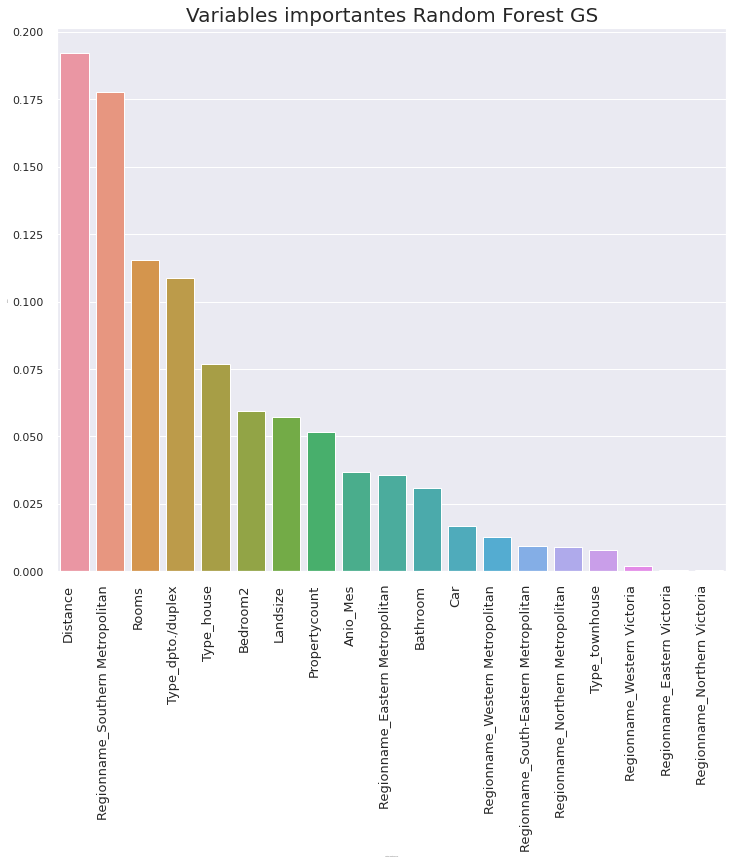

In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train_new.columns), "importance": grid_random_forest.best_estimator_.feature_importances_}
).sort_values("importance", ascending=False)

# Visualización de las Variables importantes en un gráfico de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Etiquetas
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Variables importantes Random Forest GS")
plt.xticks(
    rotation=90, horizontalalignment="right", fontweight="light", fontsize="x-large"
);

In [ ]:
predf = 10**(RFGcv)
y_testf = 10**(y_test)

#Calculamos el error absoluto
errors = abs(predf - y_testf)
print('Error absoluto medio: +/- ', round(np.mean(errors), 2), 'dólares australianos')
mape = 100*(errors / y_testf)
accuracy = 100 - np.mean(mape)
print('Precisión:', round(accuracy, 2), '%.')


#Hacemos un dataframe para comparar el valor predicho con el original
compare = pd.DataFrame()
compare['y_true'] = y_testf
compare['y_predict'] = predf
compare

Error absoluto medio: +/-  176668.05 dólares australianos
Precisión: 84.21 %.


,y_true,y_predict
30544,800000.0,698188.592309
5620,421000.0,393319.782409
8829,800000.0,801949.660784
34710,1280000.0,676184.149883
33224,650000.0,555961.901942
...,...,...
30239,610000.0,554967.372894
26420,471000.0,428588.627854
19301,381500.0,644076.317854
1835,1266000.0,954304.508481


In [ ]:
y_trainf =  10**(y_train)
np.mean(y_trainf)

1049841.0236281888

Conclusiones:
El error promedio de nuestra predicción es de +/- 176mil dólares australianos. Siendo aproximadamente 1millón el valor medio de todas las propiedades vendidas.

In [ ]:
d_full2=bckup.copy()
d_full2['Price'] = 10**(d_full2['Price'])
d_full2['Landsize'] = 10**(d_full2['Landsize'])
d_full2.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,Regionname,Propertycount,Anio_Mes
1,2,house,1480000.0,S,2.5,2.0,1.0,1.0,202.0,Northern Metropolitan,4019.0,201603
2,2,house,1035000.0,S,2.5,2.0,1.0,0.0,156.0,Northern Metropolitan,4019.0,201604
4,3,house,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,Northern Metropolitan,4019.0,201704
5,3,house,850000.0,PI,2.5,3.0,2.0,1.0,94.0,Northern Metropolitan,4019.0,201704
6,4,house,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,Northern Metropolitan,4019.0,201604


Precios medios de las viviendas vendidas por cada Región

In [ ]:
precioxreg=d_full2.groupby('Regionname').Price.mean()
precioxreg/1000

Regionname
Eastern Metropolitan          1108.723002
Eastern Victoria               714.328205
Northern Metropolitan          861.219042
Northern Victoria              619.051205
South-Eastern Metropolitan     877.682680
Southern Metropolitan         1395.831549
Western Metropolitan           837.593380
Western Victoria               432.606771
Name: Price, dtype: float64

RMSE en $AUD

In [ ]:
error1 = np.sqrt((((predf - y_testf)*(predf - y_testf)).sum())/len(predf))
error1

321605.6213777934

Para control con las métricas del Random Forest Grid Search

In [ ]:
error2 = np.sqrt((((RFGcv - y_test)*(RFGcv - y_test)).sum())/len(RFGcv))
error2

0.0932326374162199

La raíz cuadrada del error cuadrático medio expresada en dólares australianos es de $321.600 AUD.

Unimos X_train (sin RobustScaler) con variables dummies

In [ ]:
col_names = X_train.select_dtypes(exclude='object').columns
features = X_train[col_names]
X_train2 = pd.concat([features,X_train_enc.loc[:,['Type_house','Type_townhouse','Type_dpto./duplex','Regionname_Eastern Victoria',
    'Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
    'Regionname_Western Metropolitan','Regionname_Western Victoria','Regionname_Eastern Metropolitan']]], axis=1)
X_train2.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Anio_Mes,Type_house,Type_townhouse,Type_dpto./duplex,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Regionname_Eastern Metropolitan
21166,3,7.5,3,1,2,2.818226,9264.0,201709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13424,3,9.9,3,1,3,3.000000,7485.0,201704,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8726,3,2.6,3,1,3,3.000000,14949.0,201603,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,2,5.9,2,1,1,2.000000,7082.0,201607,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25277,2,8.5,2,1,2,2.000000,7485.0,201710,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train2['Landsize'] = 10**(X_train2['Landsize'])

In [ ]:
mediana1=X_train2.groupby('Regionname_Southern Metropolitan').Rooms.median()
mediana1=mediana1.iloc[1]
mediana2=X_train2.groupby('Regionname_Southern Metropolitan').Bathroom.median()
mediana2=mediana2.iloc[1]
mediana3=X_train2.groupby('Regionname_Southern Metropolitan').Bedroom2.median()
mediana3=mediana3.iloc[1]
mediana4=X_train2.groupby('Regionname_Southern Metropolitan').Car.median()
mediana4=mediana4.iloc[1]
mediana5=X_train2.groupby('Regionname_Southern Metropolitan').Landsize.mean()
mediana5=mediana5.iloc[1]


Para ver la propiedad típica vendida en Región Sur Metropolitana

In [ ]:
col={'Rooms':mediana1,'Bathroom':mediana2,'Bedroom2':mediana3,'Car':mediana4,'Landsize':mediana5}
regiones=['Regionname_Southern Metropolitan']
df2=pd.DataFrame(data=col,index=regiones)
df2

,Rooms,Bathroom,Bedroom2,Car,Landsize
Regionname_Southern Metropolitan,3.0,1.0,3.0,2.0,635.107602


In [ ]:
mediana6=X_train2.groupby('Regionname_Northern Metropolitan').Rooms.median()
mediana6=mediana6.iloc[1]
mediana7=X_train2.groupby('Regionname_Northern Metropolitan').Bathroom.median()
mediana7=mediana7.iloc[1]
mediana8=X_train2.groupby('Regionname_Northern Metropolitan').Bedroom2.median()
mediana8=mediana8.iloc[1]
mediana9=X_train2.groupby('Regionname_Northern Metropolitan').Car.median()
mediana9=mediana9.iloc[1]
mediana0=X_train2.groupby('Regionname_Northern Metropolitan').Landsize.mean()
mediana0=mediana0.iloc[1]

Para ver la propiedad típica vendida en Región Norte Metropolitana

In [ ]:
col={'Rooms':mediana6,'Bathroom':mediana7,'Bedroom2':mediana8,'Car':mediana9,'Landsize':mediana0}
regiones2=['Regionname_Northern Metropolitan']
df3=pd.DataFrame(data=col,index=regiones2)
df3

,Rooms,Bathroom,Bedroom2,Car,Landsize
Regionname_Northern Metropolitan,3.0,1.0,3.0,2.0,581.412221
